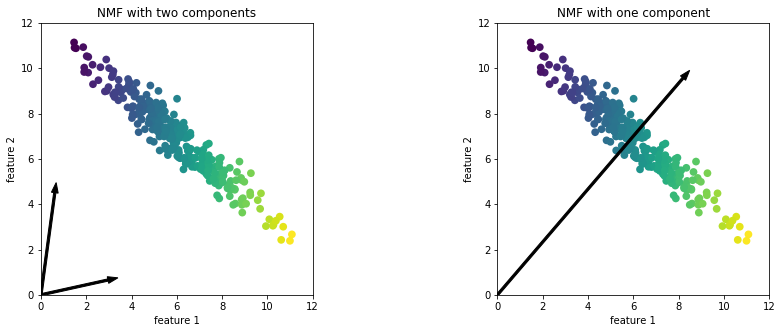

In [2]:
%matplotlib inline
import mglearn
mglearn.plots.plot_nmf_illustration()

In [4]:
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
import numpy as np

people=fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape=people.images[0].shape

mask=np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]]=1

X_people=people.data[mask]
y_people=people.target[mask]

X_people=X_people/255

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

In [6]:
import matplotlib.pyplot as plt
from sklearn.decomposition import NMF

nmf= NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf= nmf.transform(X_train)
X_test_nmf=nmf.transform (X_test)

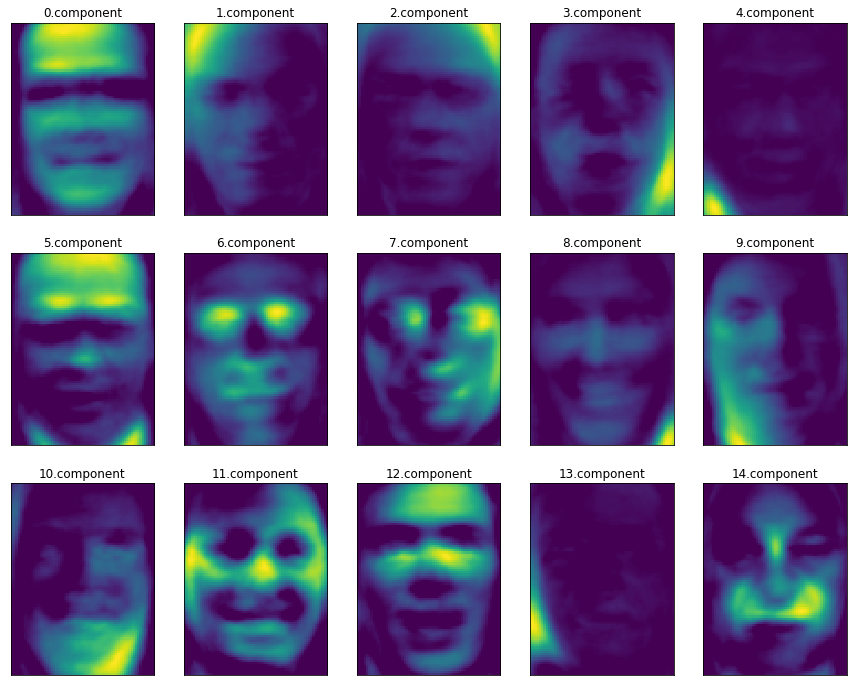

In [13]:
fig, axes = plt.subplots(3,5, figsize=(15,12),subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}.component".format(i))

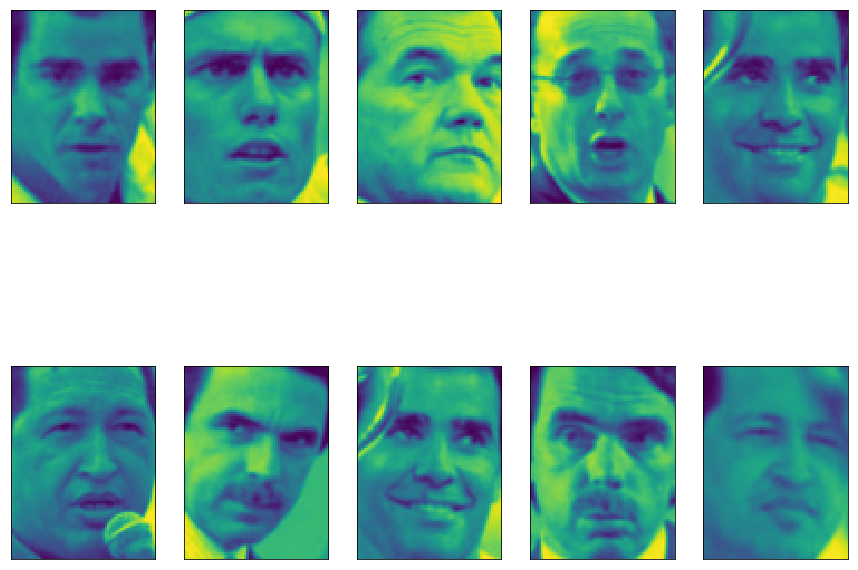

In [14]:
compn=3 #лица смотрят вправо

#сортируем по 3 компоненте, выводим первые 10 изображений

inds = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i ,(ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

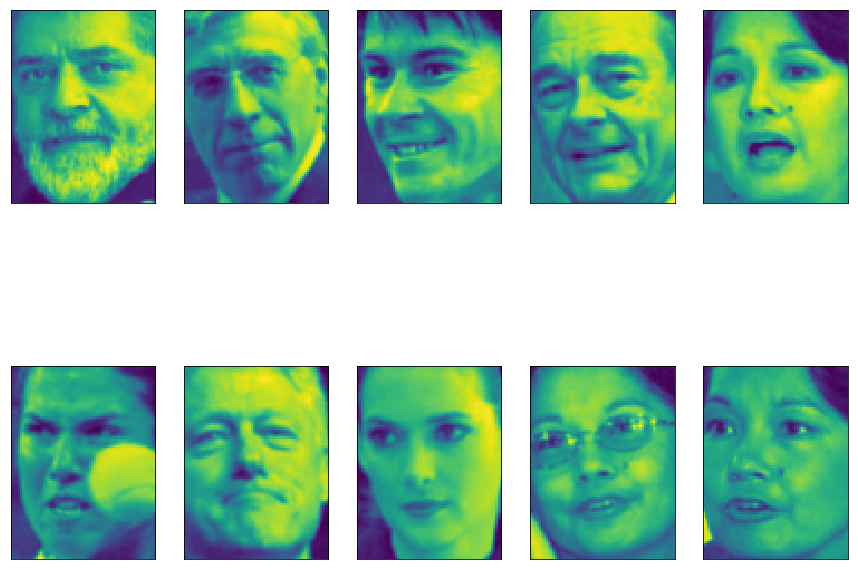

In [15]:
compn=7 #лица смотрят влево

#сортируем по 7 компоненте, выводим первые 10 изображений

inds = np.argsort(X_train_nmf[:,compn])[::-1]

fig, axes = plt.subplots(2,5, figsize=(15,12), subplot_kw={'xticks':(), 'yticks':()})

for i ,(ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0,0.5,'Signal')

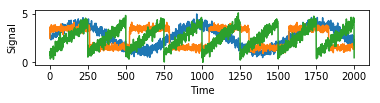

In [17]:
S= mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')

In [21]:
A = np.random.RandomState(0).uniform(size=(100,3))
X=np.dot(S, A.T)

In [25]:
nmf=NMF(n_components=3, random_state=42)
S_=nmf.fit_transform(X)

In [26]:
from sklearn.decomposition import PCA

pca=PCA(n_components=3)
H=pca.fit_transform(X)

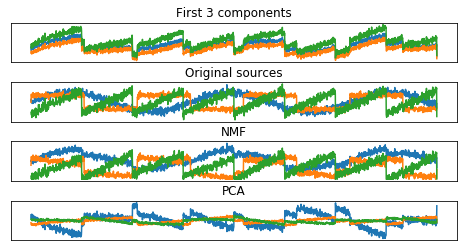

In [30]:
models=[X,S,S_,H]

names=['First 3 components', 'Original sources', 'NMF', 'PCA']

fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':0.5}, subplot_kw={'xticks':(), "yticks":()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3],'-')